In [4]:
import numpy as np
import pandas as pd 
## Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


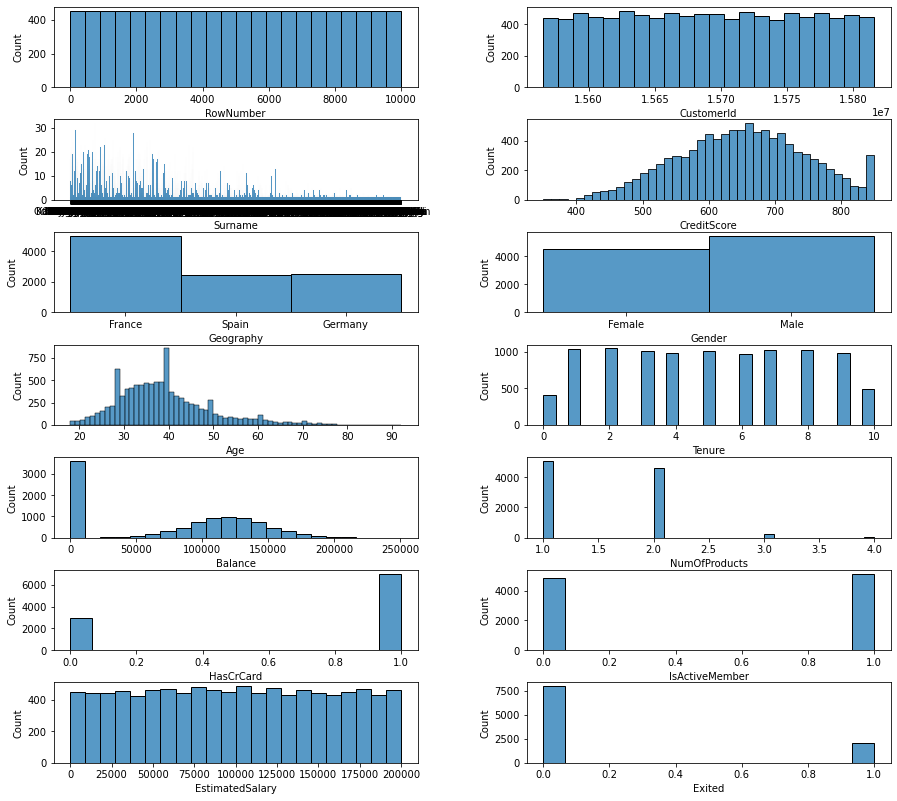

In [6]:
#uni variate analysis of each columns
fig, ax = plt.subplots(7, 2, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(dataset.columns, ax.flatten()):
    sns.histplot(dataset[variable], ax=subplot)

<Figure size 576x432 with 0 Axes>

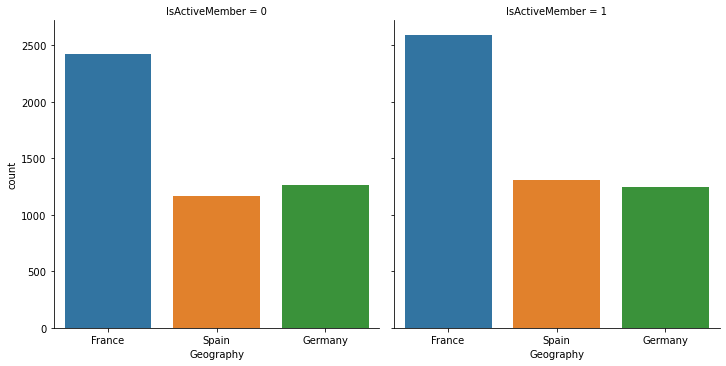

In [7]:
#bivariate analysis to check wheater which country has more active member and less
plt.figure(figsize=(8,6))
sns.catplot(x='Geography', col='IsActiveMember', kind='count', data=dataset)

<Figure size 576x432 with 0 Axes>

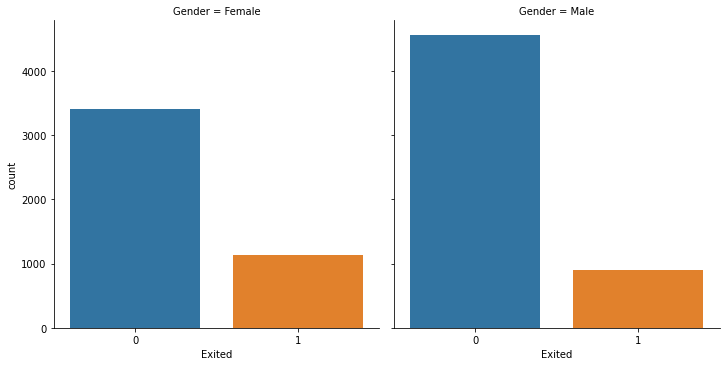

In [8]:
plt.figure(figsize=(8,6))
sns.catplot(x='Exited', col='Gender', kind='count', data=dataset)

<Figure size 576x432 with 0 Axes>

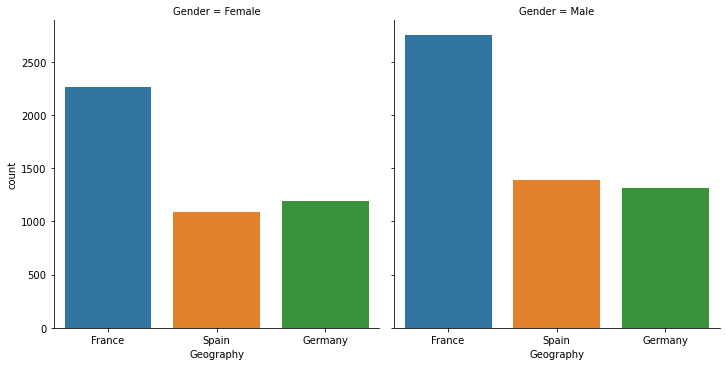

In [9]:
plt.figure(figsize=(8,6))

sns.catplot(x='Geography', col='Gender' ,kind='count', data=dataset)

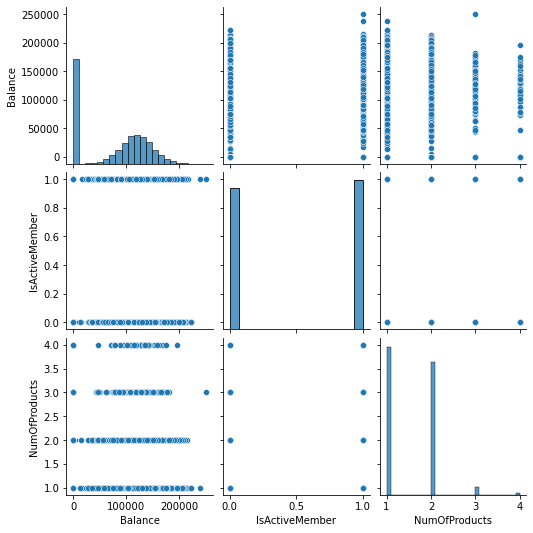

In [11]:
sns.pairplot(data=dataset[['Geography','Balance','Gender','IsActiveMember','NumOfProducts']])

In [12]:
dataset.isnull().sum()
#no missing values to be handeled 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
#finding out ouliers

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

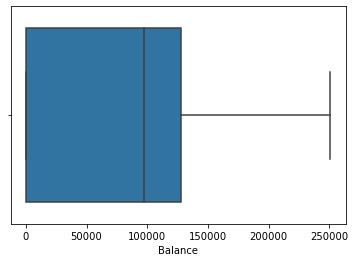

In [14]:
sns.boxplot(dataset['Balance'],data=dataset)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

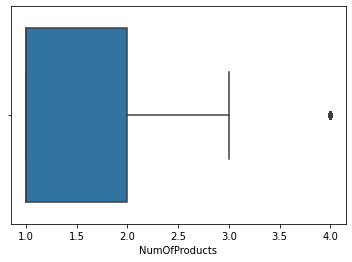

In [16]:
sns.boxplot(dataset['NumOfProducts'],data=dataset)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

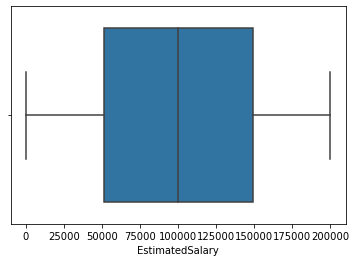

In [17]:
sns.boxplot(dataset['EstimatedSalary'],data=dataset)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

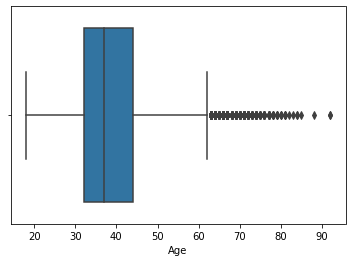

In [18]:
sns.boxplot(dataset['Age'],data=dataset)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

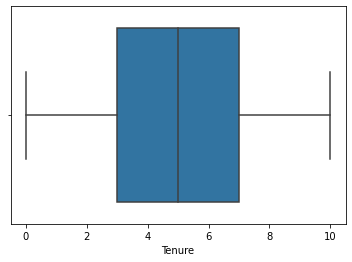

In [19]:
sns.boxplot(dataset['Tenure'],data=dataset)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

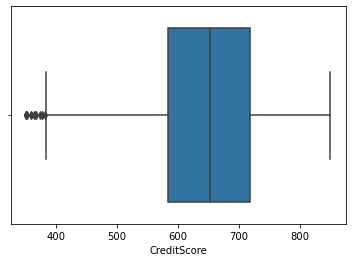

In [21]:
sns.boxplot(dataset['CreditScore'],data=dataset)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

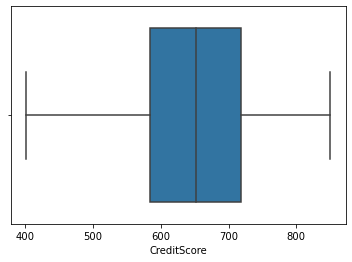

In [26]:
#removed the out lier with median
dataset['CreditScore'] = np.where(dataset['CreditScore'] < 400, 600, dataset['CreditScore'])
sns.boxplot(dataset['CreditScore'],data=dataset)

In [29]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Loan_amount          int64
dtype: object

In [30]:
#geography , gender , HasCrCard ,IsActiveMember ,Exited

In [32]:
dataset['Gender']=dataset['Gender'].astype('category')
dataset['gen_code']=dataset['Gender'].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loan_amount,gen_code
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,619,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,608,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,502,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,699,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,850,0


In [34]:
dataset['Geography']=dataset['Geography'].astype('category')
dataset['Geography_code']=dataset['Geography'].cat.codes
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loan_amount,gen_code,Geography_code
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,771,1,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,516,1,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,709,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,772,1,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,792,0,0


In [38]:
#independent 'everything is indepenedent other than exited'
X = dataset.iloc[:, :-4].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [39]:
#dependent 'Exited'
Y = dataset.iloc[:, -4].values
print(Y)

[1 0 1 ... 1 1 0]


In [59]:
#normalize/scale / Standardise  the independent variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
from sklearn import tree
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor

In [83]:
X = dataset.iloc[:, 3:-4 ]
print(X)
y = dataset.loc[:, ['Exited']]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
print(X_train[4:6])
sx_train=sc.fit_transform(X_train.iloc[:,[-5,-1]])
print(sx_train)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           